## Simple regression using a single feature to predict the mileage of an automobile
Dataset : https://www.kaggle.com/uciml/autompg-dataset  
Preprocessing : ./Automobile Mpg Dataset Exploration.ipynb  
References : pluralsight.com

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.linear_model import LinearRegression

In [7]:
automobile_df = pd.read_csv("./datasets/auto-mpg-processed.csv")
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
43,23.0,4,140.0,78,2592,18.5,45
361,18.0,6,250.0,105,3459,16.0,45
270,26.0,4,97.0,46,1950,21.0,47
25,26.0,4,156.0,92,2585,14.5,38
69,14.0,8,318.0,150,4237,14.5,47


In [18]:
X = automobile_df[['horsepower']]
Y = automobile_df['mpg']

In [19]:
X.shape, Y.shape

((392, 1), (392,))

In [20]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [21]:
x_train.sample(4)

,horsepower
349,78
115,88
248,70
289,60


In [23]:
linear_regression = LinearRegression(normalize=True).fit(x_train,y_train)
#model performs better if the data is normalized
#it scales the column to be between 0 and 1

## Evaluation of the model (using r-square)
r-square measures how well the linear model captures the underlying variance in the training data

In [26]:
print("Training score ", linear_regression.score(x_train,y_train))

Training score  0.6089318834750184


In [27]:
y_pred = linear_regression.predict(x_test)

In [29]:
from sklearn.metrics import r2_score
print("Test score: ", r2_score(y_test,y_pred))

Test score:  0.5574781703648531


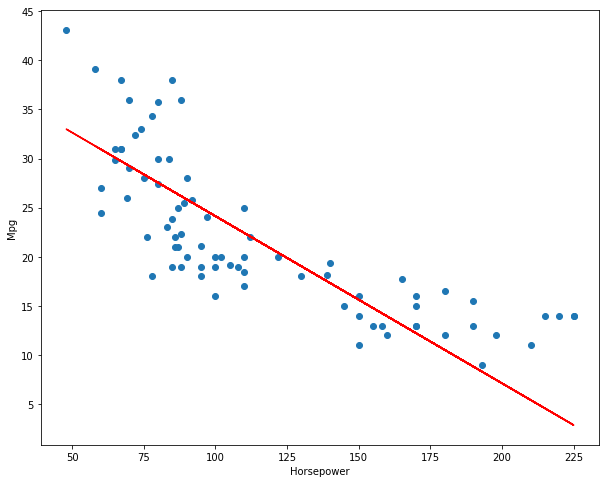

In [33]:
fig,ax = plt.subplots(figsize=(10,8))

plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,color='red')
plt.xlabel("Horsepower")
plt.ylabel("Mpg")
plt.show()

In the plot above we can see that the red line is our predicted values for mpg whereas the scattered plot are the actual values. Our model did not seem to fit the data properly. The r-square value for the test is just 0.55

In [34]:
X = automobile_df[['age']]
Y = automobile_df['mpg']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

linear_regression = LinearRegression(normalize=True).fit(x_train,y_train)
print("Training score ", linear_regression.score(x_train,y_train))
y_pred = linear_regression.predict(x_test)
print("Test score: ", r2_score(y_test,y_pred))

Training score  0.3542733325032382
Test score:  0.23725251693327498


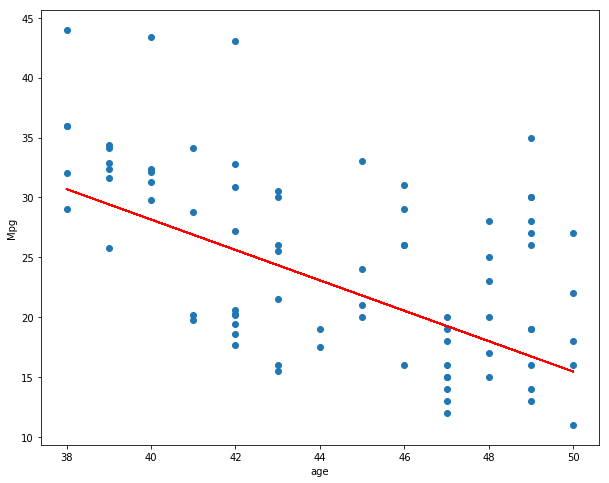

In [35]:
fig,ax = plt.subplots(figsize=(10,8))

plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,color='red')
plt.xlabel("age")
plt.ylabel("Mpg")
plt.show()

We can see that when using 'age' as a single feature, the model performed worse. This can be verified by the plot above where our 'best fit line' did not really fit the data. Hence our r-square value for the test data is pretty low as well(0.23). 

### Remarks
We can probably improve this model by performing linear regression with multiple features